In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
import jupyter_dashboards

In [4]:
conda install jupyter_dashboards -c conda-forge

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv("googleplaystore.csv")

In [6]:
df.shape

(10841, 13)

In [7]:
outlier = df[df.Installs == "Free"]
print(outlier)

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


In [8]:
df= df.drop([10472], axis='rows')


In [9]:
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].astype(int)

In [11]:
df.shape

(10840, 13)

In [12]:
data = pd.concat([df.Category, df.Installs, df["Content Rating"]], axis=1)
data.head()

,Category,Installs,Content Rating
0,ART_AND_DESIGN,10000,Everyone
1,ART_AND_DESIGN,500000,Everyone
2,ART_AND_DESIGN,5000000,Everyone
3,ART_AND_DESIGN,50000000,Teen
4,ART_AND_DESIGN,100000,Everyone


In [13]:
data.dtypes


Category          object
Installs           int32
Content Rating    object
dtype: object

In [14]:
data.shape

(10840, 3)

In [15]:
data=data.dropna()

In [16]:
data.shape

(10840, 3)

In [17]:
pd.value_counts(data["Content Rating"])

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [18]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [19]:
data.shape

(10840, 3)

In [20]:
group = data.groupby([ 'Category']).sum()
print(group)

                         Installs
Category                         
ART_AND_DESIGN       1.243381e+08
AUTO_AND_VEHICLES    5.313021e+07
BEAUTY               2.719705e+07
BOOKS_AND_REFERENCE  1.921470e+09
BUSINESS             1.001915e+09
COMICS               5.608615e+07
COMMUNICATION        3.264728e+10
DATING               2.643108e+08
EDUCATION            8.714520e+08
ENTERTAINMENT        2.869160e+09
EVENTS               1.597316e+07
FAMILY               1.025826e+10
FINANCE              8.766487e+08
FOOD_AND_DRINK       2.738988e+08
GAME                 3.508602e+10
HEALTH_AND_FITNESS   1.583073e+09
HOUSE_AND_HOME       1.687125e+08
LIBRARIES_AND_DEMO   6.299591e+07
LIFESTYLE            5.376435e+08
MAPS_AND_NAVIGATION  7.242819e+08
MEDICAL              5.325744e+07
NEWS_AND_MAGAZINES   7.496318e+09
PARENTING            3.152111e+07
PERSONALIZATION      2.325495e+09
PHOTOGRAPHY          1.008825e+10
PRODUCTIVITY         1.417609e+10
SHOPPING             3.247849e+09
SOCIAL        

In [21]:
group.sum()

Installs    1.676334e+11
dtype: float64

In [22]:
groups = data.groupby(by=['Content Rating','Category']).agg('Installs').sum()

print(groups)

Content Rating   Category         
Adults only 18+  COMICS               1.000000e+06
                 SPORTS               1.000000e+06
Everyone         ART_AND_DESIGN       6.382810e+07
                 AUTO_AND_VEHICLES    4.213021e+07
                 BEAUTY               2.671705e+07
                                          ...     
Teen             TRAVEL_AND_LOCAL     2.160005e+07
                 VIDEO_PLAYERS        3.496156e+09
                 WEATHER              6.000000e+05
Unrated          FAMILY               5.000000e+02
                 TOOLS                5.000000e+04
Name: Installs, Length: 118, dtype: float64


In [23]:
sorted=data.sort_values(['Content Rating'])
print(sorted)

                Category  Installs   Content Rating
6424              COMICS    500000  Adults only 18+
298               COMICS    500000  Adults only 18+
3043              SPORTS   1000000  Adults only 18+
0         ART_AND_DESIGN     10000         Everyone
6893  HEALTH_AND_FITNESS        50         Everyone
...                  ...       ...              ...
1022              EVENTS       500             Teen
9576              FAMILY   5000000             Teen
899        ENTERTAINMENT  10000000             Teen
8266               TOOLS     50000          Unrated
7312              FAMILY       500          Unrated

[10840 rows x 3 columns]


In [24]:
groups = sorted.groupby(by=['Content Rating','Category']).agg('Installs').sum()

print(groups)

Content Rating   Category         
Adults only 18+  COMICS               1.000000e+06
                 SPORTS               1.000000e+06
Everyone         ART_AND_DESIGN       6.382810e+07
                 AUTO_AND_VEHICLES    4.213021e+07
                 BEAUTY               2.671705e+07
                                          ...     
Teen             TRAVEL_AND_LOCAL     2.160005e+07
                 VIDEO_PLAYERS        3.496156e+09
                 WEATHER              6.000000e+05
Unrated          FAMILY               5.000000e+02
                 TOOLS                5.000000e+04
Name: Installs, Length: 118, dtype: float64


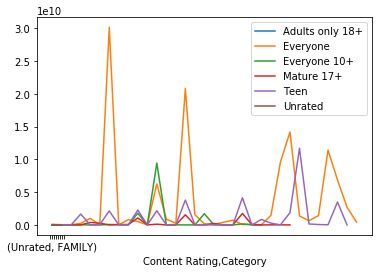

In [26]:
fig, ax = plt.subplots()

for key, grp in groups.groupby(['Content Rating']):
    ax = grp.plot(ax=ax, kind='line', x='Category', y='Installs', label=key)


plt.legend(loc='best')
plt.show()

In [29]:
groups.shape

(118,)

In [ ]:
data.groupby('Content Rating')

In [28]:
data.groupby('Content Rating').sum()



,Installs
Content Rating,
Adults only 18+,2.000000e+06
Everyone,1.141567e+11
Everyone 10+,1.323388e+10
Mature 17+,5.524491e+09
Teen,3.471635e+10
Unrated,5.050000e+04


In [31]:
groups.to_csv('Content_Groups.csv')